In [50]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv(r'D:\Kuliah\SEM 5\ml\7\Unsupervised Learning (Praktek)\Unsupervised Learning (Praktek)\Tugas4_A_11706\credit_card.csv')
credit.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [51]:
print("data null \n",credit.isnull().sum())
print("data kosong \n",credit.empty)
print("data nan \n",credit.isna().sum())

data null 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
data kosong 
 False
data nan 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [52]:
df_credit = credit.drop(['Customer Key', 'Sl_No'], axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

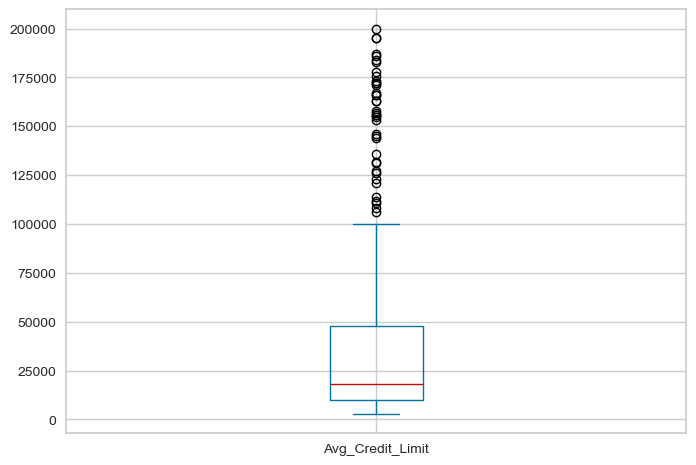

In [53]:
df_credit['Avg_Credit_Limit'].plot(kind='box')

Jumlah data sebelum dibuang outlier: 660
Jumlah data sesudah dibuang outlier: 621


<Axes: >

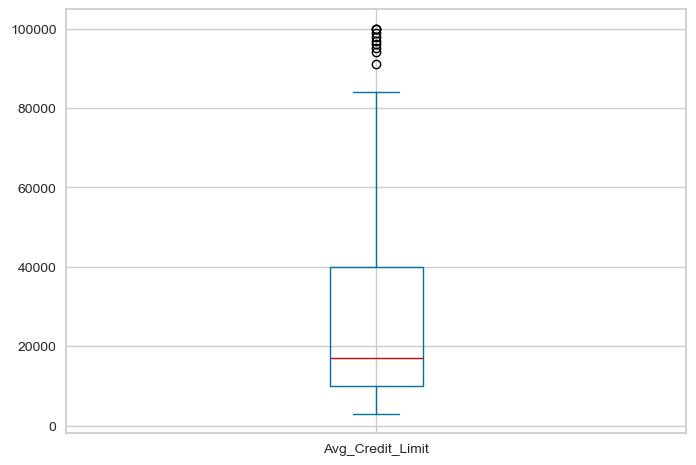

In [54]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(data_frame, kolom_outlier):
    if is_numeric_dtype(data_frame[kolom_outlier]):
        q1 = data_frame[kolom_outlier].quantile(0.25)
        q3 = data_frame[kolom_outlier].quantile(0.75)

        iqr = q3-q1
        batas_atas = q3 + (1.5 * iqr)
        batas_bawah = q1 - (1.5 * iqr)

        df_out = data_frame.loc[(data_frame[kolom_outlier] >= batas_bawah) & (data_frame[kolom_outlier] <= batas_atas)]
    return df_out

data_bersih = remove_outlier(df_credit, 'Avg_Credit_Limit')

print("Jumlah data sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah data sesudah dibuang outlier:", data_bersih.shape[0])

data_bersih['Avg_Credit_Limit'].plot(kind='box')

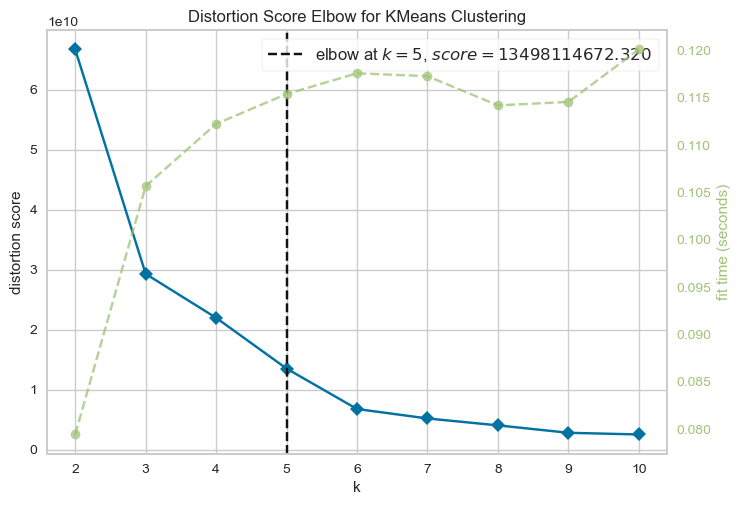

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.cluster import KElbowVisualizer

kMeansC = KMeans(random_state=6)
vis = KElbowVisualizer(kMeansC,k=(2,11))
vis.fit(data_bersih)

vis.show()

Silhouette Score K-Means for  2  clusters : 0.7275517813087928
Silhouette Score K-Means for  3  clusters : 0.7058100919802311
Silhouette Score K-Means for  4  clusters : 0.5928895843252326
Silhouette Score K-Means for  5  clusters : 0.6072469306603215
Silhouette Score K-Means for  6  clusters : 0.6271336425919736
Silhouette Score K-Means for  7  clusters : 0.6213534164208421
Silhouette Score K-Means for  8  clusters : 0.589051066775017
Silhouette Score K-Means for  9  clusters : 0.6112550732697222
Silhouette Score K-Means for  10  clusters : 0.6085204794255568


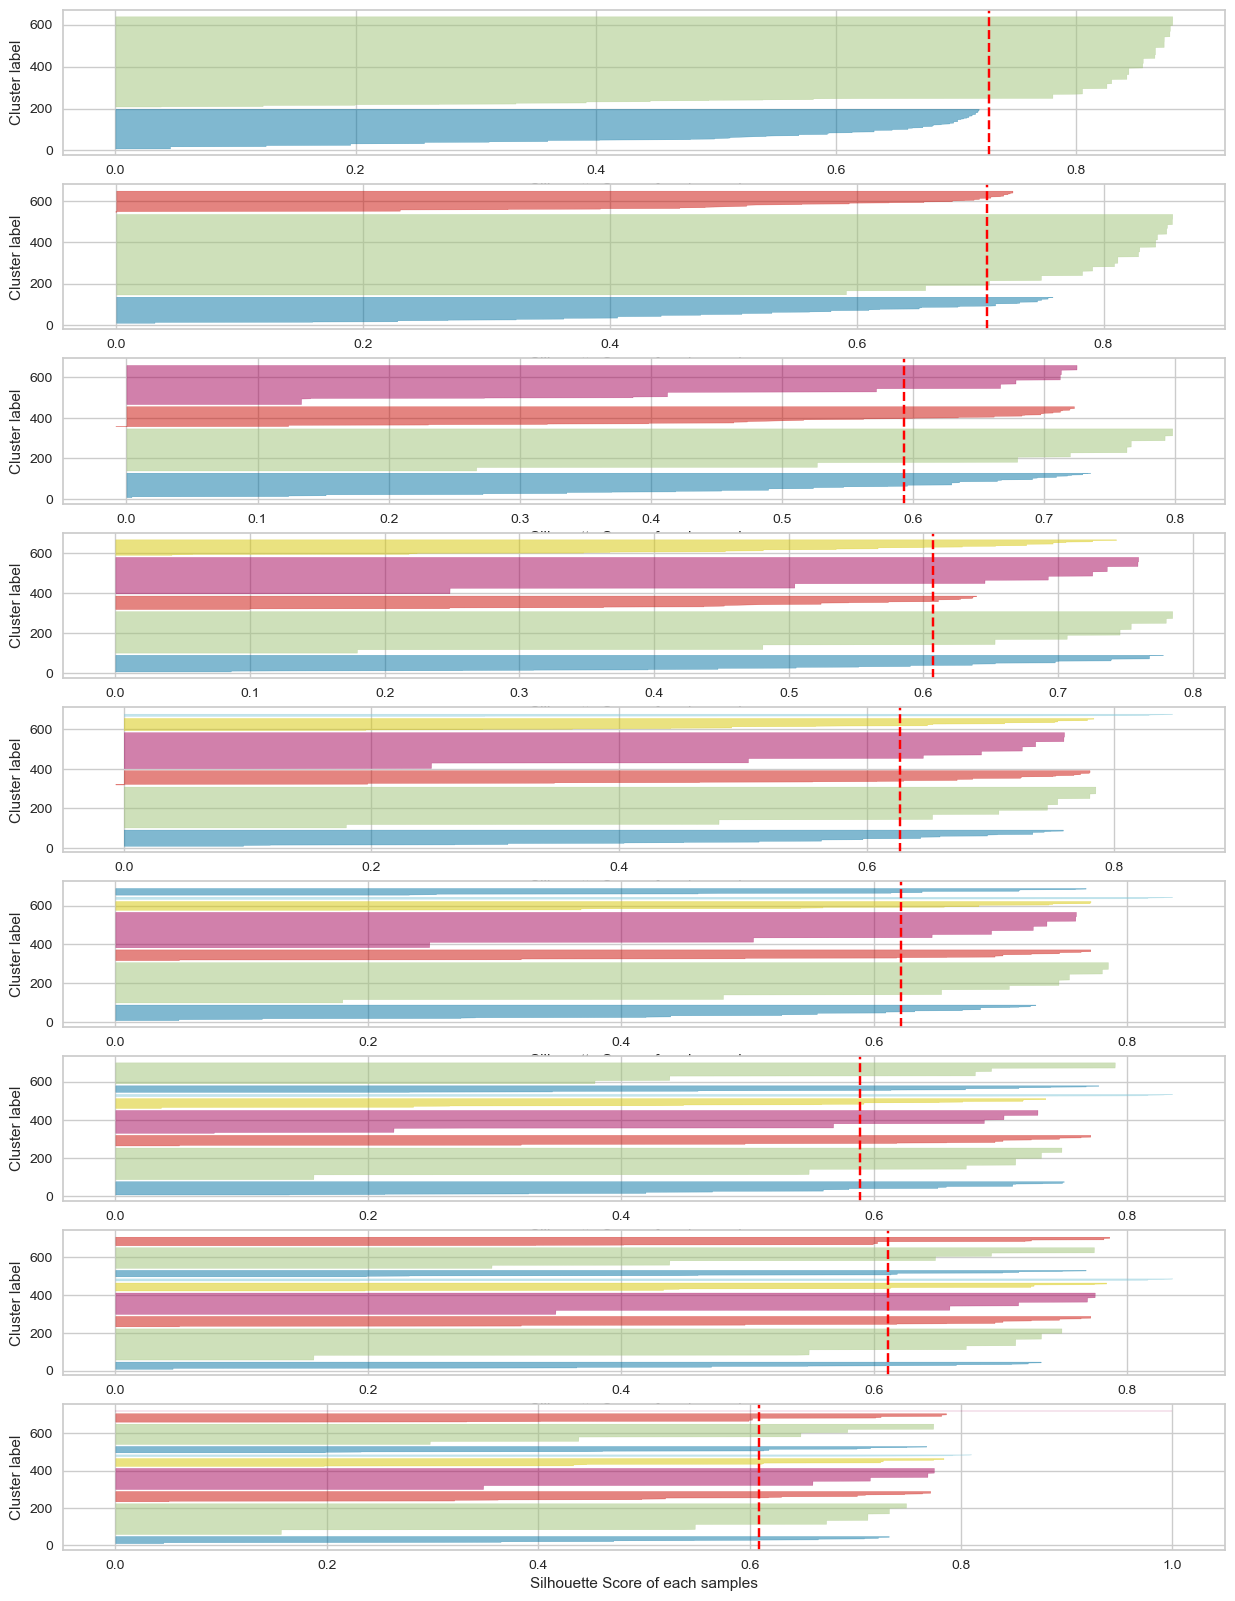

In [57]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(9,1, figsize=(15,20))

for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=6)

    KM_clusters=kMeansC.fit_predict(data_bersih)
    print("Silhouette Score K-Means for ", k, " clusters :", silhouette_score(data_bersih , KM_clusters))

    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(data_bersih) 

    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [58]:
data_bersih.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

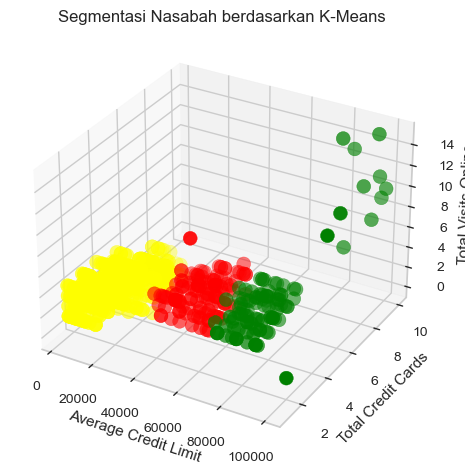

Silhouette Score K-Means: 0.706


In [60]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=6)
K_clusters = kmeans.fit_predict(data_bersih)

fig = plt.figure()
ax = plt.axes(projection='3d')

cluster_colors = {0: 'red', 1:'yellow', 2: 'green', 3: 'blue', 4:'magenta', 5:'black', 6: 'cyan'}

ax.scatter(data_bersih['Avg_Credit_Limit'], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means' )
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()


print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, K_clusters))

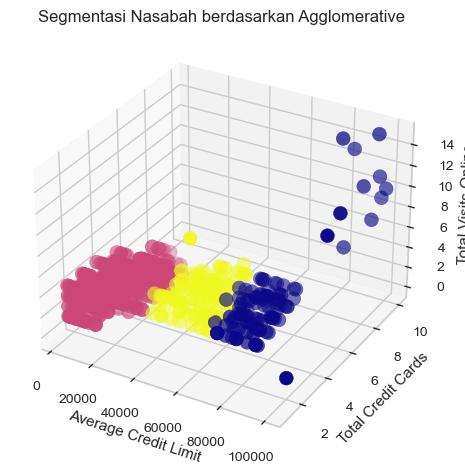

Silhouette Score K-Means: 0.705


In [61]:
import seaborn as sns
from matplotlib.colors import ListedColormap

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_clusters = AGG.fit_predict(data_bersih)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit' ], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()


print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, AGG_clusters))

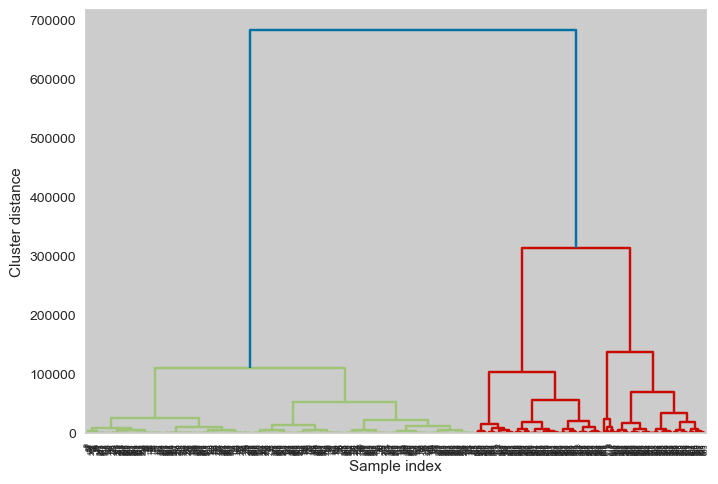

In [62]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(data_bersih,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()

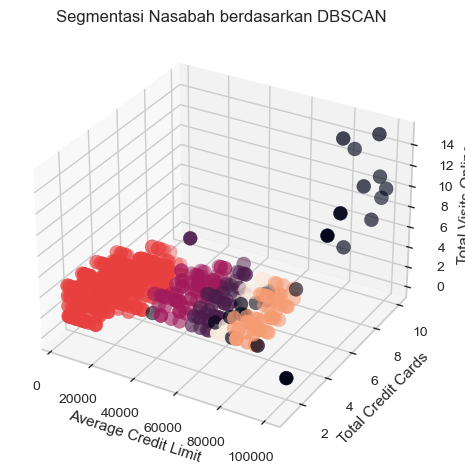

Silhouette Score K-Means: 0.657


In [64]:
DBSC = DBSCAN(min_samples=20,eps=2500)

DBSC_clusters = DBSC.fit_predict(data_bersih)

from matplotlib.colors import ListedColormap

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex())

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(data_bersih['Avg_Credit_Limit' ], data_bersih['Total_Credit_Cards'], data_bersih['Total_visits_online'],
           c=DBSC_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan DBSCAN')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()


print("Silhouette Score K-Means: %0.3f" % silhouette_score(data_bersih, DBSC_clusters))

In [66]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan


In [ ]:
import streamlit as st
import pandas as pd
import pickle
import os
import plotly.express as px
import numpy as np
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go

def scatter(model, model_name, data, new_point, features, color_scale, title):
    clusters = model.fit_predict(data[features])
    data[f"{model_name}_Cluster"] = clusters

    if model_name == "KMeans_model":
        new_cluster = model.predict(new_point[features])[0]
    else:
        distances = pairwise_distances(new_point[features], data[features])
        nearest_index = distances.argmin()
        new_cluster = clusters[nearest_index]

    fig = px.scatter_3d(data, x='Avg_Credit_Limit', y='Total_Credit_Cards', z='Total_visits_online',
                        color=f"{model_name}_Cluster", title=title, color_continuous_scale=color_scale)
    
    fig.add_trace(
        go.scatter3d(
            x=new_point['Avg_Credit_Limit'],
            y=new_point['Total_Credit_Cards'],
            z=new_point['Total_visits_online'],
            mode='markers',
            marker=dict(size=10, color='red'),
            name='New Point'
        )
    )
    return fig, new_cluster

st.set_page_config(
    page_title="11706 - Unsupervised Learning"
    page_icon="📊",
    layout="wide"
    initial_sidebar_state="expanded"
)

uploaded_file = st.sidebar.file_uploader("Upload your input CSV file", type=["csv"])

if uploaded_file is not None:
    input_data = pd.read_csv(uploaded_file)
    st.markdown("<h1 style='text-align: center;'>Unsupervised Learning - VITA</h1>", unsafe_allow_html=True)
    st.dataframe(input_data)

    model_directory = r'D:\Kuliah\SEM 5\ml\7\Unsupervised Learning (Praktek)\Unsupervised Learning (Praktek)\Tugas4_A_11706'
    model_path = {
        "AGG_model" : os.path.join(model_directory, r'AGG_model.pkl'),
        "KMeans_model" : os.path.join(model_directory, r'KMeans_model.pkl'),
        "DBSCAN_model" : os.path.join(model_directory, r'DBSCAN_model.pkl'),
    }

    models = {}

    for model_name, path in model_path.items():
        if os.path.exists(path):
            with open(path, 'rb') as f:
                models[model_name] = pickle.load(f)
        else:
            st.write(f"Model {model_name} tidak ditemukan di path : ", path)

    avg_CL = st.sidebar.number_input("Average Credit Limit", 0, 100000)
    sum_CC = st.sidebar.number_input("Total Credit Cards", 0, 10)
    sum_VO = st.sidebar.number_input("Total Visits Online", 0, 16)

    if st.sidebar.button("Prediksi !"):
        features = ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_online']
        new_point = pd.DataFrame({
            'Avg_Credit_Limit': [avg_CL],
            'Total_Credit_Cards': [sum_CC],
            'Total_visits_online': [sum_VO]
        })
        
        cluster_method = [
            ("KMeans_model", models["KMeans_model"], "KMeans Clustering", px.colors.sequential.Cividis),
            ("AGG_model", models["AGG_model"], "Agglomerative Clustering", px.colors.sequential.Mint),
            ("DBSCAN_model", models["DBSCAN_model"], "DBSCAN Clustering", px.colors.sequential.Plasma)
        ]
        
        col1, col2, col3 = st.columns(3)
        cols = [col1, col2, col3]
        
        for i, (model_name, model, title, color_scale) in enumerate(cluster_method):
            fig, new_cluster = scatter(model, model_name, input_data, new_point, features, color_scale, title)
            with cols[i]:
                st.plotly_chart(fig)
                st.markdown(f"<p style='text-align: center;'>Titik Data yang baru masuk ke dalam cluster : {new_cluster}</p>", unsafe_allow_html=True)